In [64]:
pip install langgraph langchain

In [65]:
pip install langsmith langchain_groq langchain_community

In [66]:
from google.colab import userdata
groq_api_key=userdata.get('groq_api_key')
langsmith=userdata.get('LANGSMITH_API_KEY')


In [67]:
import os
os.environ['GROQ_API_KEY']=groq_api_key
os.environ['LANGSMITH_API_KEY']=langsmith
os.environ['LANGCHAIN_TRACING_V2']="true"
os.environ['LANGCHAIN_PROJECT']="CourseLanggraph"

In [68]:
from langchain_groq import ChatGroq

In [69]:
llm=ChatGroq(groq_api_key=groq_api_key, model_name="Gemma2-9b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7d05a37aa550>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7d05a37aad10>, model_name='Gemma2-9b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

#Starting building Chatbot using Langgraph


In [70]:
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages

In [71]:
class State(TypedDict):
  "add the message to the list rather than overrighting"
  messages:Annotated[list, add_messages]
graph_builder = StateGraph(State)
graph_builder


## The chatbot will be interacting with an llm , next we are gonna define that

In [72]:
def chatbot(state: State):
  return{"messages":llm.invoke(state["messages"])}

graph_builder.add_node("chatbot", chatbot)
graph_builder

##connect the graph builder to the start and to the end

In [77]:
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)
#graph = graph_builder.compile()
print(graph_builder)

##Executing the chatbot

In [78]:
while True:
  user_input=input("user: ")
  if user_input.lower()in ["quit", "q"]:
    print("Good bye ")
    break
  for event in graph.stream({ "messages" :("user", user_input)}):
    print(event.values())
    for values in event.values():
      print(values["messages"])

user: hi
dict_values([{'messages': AIMessage(content='Hi there! 👋 \n\nWhat can I do for you today? 😊\n', additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 11, 'total_tokens': 29, 'completion_time': 0.032727273, 'prompt_time': 0.001872791, 'queue_time': 0.263724819, 'total_time': 0.034600064}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on_demand', 'finish_reason': 'stop', 'logprobs': None}, id='run--54df1731-1e6a-40cc-b496-abbb96170bb6-0', usage_metadata={'input_tokens': 11, 'output_tokens': 18, 'total_tokens': 29})}])
content='Hi there! 👋 \n\nWhat can I do for you today? 😊\n' additional_kwargs={} response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 11, 'total_tokens': 29, 'completion_time': 0.032727273, 'prompt_time': 0.001872791, 'queue_time': 0.263724819, 'total_time': 0.034600064}, 'model_name': 'Gemma2-9b-It', 'system_fingerprint': 'fp_10c08bf97d', 'service_tier': 'on

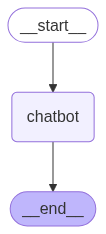

In [80]:
from IPython.display import Image, display
try:
  display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
  pass